<a href="https://colab.research.google.com/github/alexk2206/tds_capstone/blob/Alex-DEV/model_evaluations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model evaluations
Created by: Alexander Keßler

In [135]:
#!pip install evaluate
import pandas as pd
import json
import evaluate
from evaluate.visualization import radar_plot
import matplotlib.pyplot as plt
import seaborn as sns

## Load required data

All the model results are saved separately for selection and open-ended questions. We loaded them in this notebook, appended them, and displayed value counts and shapes. The underlying test_qa_dataset was always the same.


In [136]:
albert_fine_tuned_mc_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/albert_fine_tuned_mc_results.json'
albert_fine_tuned_oe_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/albert_fine_tuned_oe_results.json'
albert_mc_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/albert_mc_results.json'
albert_oe_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/albert_oe_results.json'
bert_fine_tuned_mc_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/bert_fine_tuned_mc_results.json'
bert_fine_tuned_oe_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/bert_fine_tuned_oe_results.json'
bert_mc_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/bert_mc_results.json'
bert_oe_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/bert_oe_results.json'
roberta_mc_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/roberta_mc_results.json'
roberta_oe_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/roberta_oe_results.json'
xlnet_mc_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/xlnet_mc_results.json'
xlnet_oe_results_url = 'https://raw.githubusercontent.com/alexk2206/tds_capstone/refs/heads/main/eval/xlnet_oe_results.json'

albert_fine_tuned_mc_results = pd.read_json(albert_fine_tuned_mc_results_url)
albert_fine_tuned_oe_results = pd.read_json(albert_fine_tuned_oe_results_url)
albert_mc_results = pd.read_json(albert_mc_results_url)
albert_oe_results = pd.read_json(albert_oe_results_url)
bert_fine_tuned_mc_results = pd.read_json(bert_fine_tuned_mc_results_url)
bert_fine_tuned_oe_results = pd.read_json(bert_fine_tuned_oe_results_url)
bert_mc_results = pd.read_json(bert_mc_results_url)
bert_oe_results = pd.read_json(bert_oe_results_url)
roberta_mc_results = pd.read_json(roberta_mc_results_url)
roberta_oe_results = pd.read_json(roberta_oe_results_url)
xlnet_mc_results = pd.read_json(xlnet_mc_results_url)
xlnet_oe_results = pd.read_json(xlnet_oe_results_url)

In [137]:
albert_fine_tuned_results = pd.concat([albert_fine_tuned_mc_results, albert_fine_tuned_oe_results], ignore_index=True)
albert_results = pd.concat([albert_mc_results, albert_oe_results], ignore_index=True)
bert_fine_tuned_results = pd.concat([bert_fine_tuned_mc_results, bert_fine_tuned_oe_results], ignore_index=True)
bert_results = pd.concat([bert_mc_results, bert_oe_results], ignore_index=True)
roberta_results = pd.concat([roberta_mc_results, roberta_oe_results], ignore_index=True)
xlnet_results = pd.concat([xlnet_mc_results, xlnet_oe_results], ignore_index=True)

In [138]:
# Concatenate the results DataFrames
albert_fine_tuned_results = pd.concat([albert_fine_tuned_mc_results, albert_fine_tuned_oe_results], ignore_index=True)
albert_results = pd.concat([albert_mc_results, albert_oe_results], ignore_index=True)
bert_fine_tuned_results = pd.concat([bert_fine_tuned_mc_results, bert_fine_tuned_oe_results], ignore_index=True)
bert_results = pd.concat([bert_mc_results, bert_oe_results], ignore_index=True)
roberta_results = pd.concat([roberta_mc_results, roberta_oe_results], ignore_index=True)
xlnet_results = pd.concat([xlnet_mc_results, xlnet_oe_results], ignore_index=True)

# Save each DataFrame to a JSON file using 'records' orient (with one JSON object per line)
albert_fine_tuned_results.to_json("albert_fine_tuned_results.json", orient="records", lines=False)
albert_results.to_json("albert_results.json", orient="records", lines=False)
bert_fine_tuned_results.to_json("bert_fine_tuned_results.json", orient="records", lines=False)
bert_results.to_json("bert_results.json", orient="records", lines=False)
roberta_results.to_json("roberta_results.json", orient="records", lines=False)
xlnet_results.to_json("xlnet_results.json", orient="records", lines=False)

In [ ]:
albert_fine_tuned_results.head()

,model,intended_answer_binary,predicted_answer_binary,intended_answer,predicted_answer,type,difficulty
0,/content/drive/MyDrive/mc_models/albert/albert...,"[0, 0, 0, 1, 0]","[1, 0, 0, 0, 0]",Operations,R&D,SINGLE_SELECT,easy
1,/content/drive/MyDrive/mc_models/albert/albert...,"[0, 0, 0, 0, 1]","[0, 0, 0, 1, 0]",Not sure,Over 6 months,SINGLE_SELECT,easy
2,/content/drive/MyDrive/mc_models/albert/albert...,"[1, 0, 0, 0, 0]","[0, 0, 0, 1, 0]",Very satisfied,Unsatisfied,SINGLE_SELECT,easy
3,/content/drive/MyDrive/mc_models/albert/albert...,"[1, 0, 0, 0, 0]","[0, 0, 1, 0, 0]",Exploration,Decision-making,SINGLE_SELECT,easy
4,/content/drive/MyDrive/mc_models/albert/albert...,"[0, 1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]",German,English,SINGLE_SELECT,easy


In [ ]:
# Count the occurrences of the 'type' value in each DataFrame column
albert_fine_tuned_results_type_count = albert_fine_tuned_results['type'].value_counts()
albert_results_type_count = albert_results['type'].value_counts()
bert_fine_tuned_results_type_count = bert_fine_tuned_results['type'].value_counts()
bert_results_type_count = bert_results['type'].value_counts()
roberta_results_type_count = roberta_results['type'].value_counts()
xlnet_results_type_count = xlnet_results['type'].value_counts()

# Shape of the DataFrames
albert_fine_tuned_results_shape = albert_fine_tuned_results.shape
albert_results_shape = albert_results.shape
bert_fine_tuned_results_shape = bert_fine_tuned_results.shape
bert_results_shape = bert_results.shape
roberta_results_shape = roberta_results.shape
xlnet_results_shape = xlnet_results.shape

# Output for each model separately
print(f"Albert Fine-Tuned Model:")
print(f"Shape: {albert_fine_tuned_results_shape}")
print(f"Type counts:\n{albert_fine_tuned_results_type_count}\n")
print("-" * 50)

print(f"Albert Model:")
print(f"Shape: {albert_results_shape}")
print(f"Type counts:\n{albert_results_type_count}\n")
print("-" * 50)

print(f"Bert Fine-Tuned Model:")
print(f"Shape: {bert_fine_tuned_results_shape}")
print(f"Type counts:\n{bert_fine_tuned_results_type_count}\n")
print("-" * 50)

print(f"Bert Model:")
print(f"Shape: {bert_results_shape}")
print(f"Type counts:\n{bert_results_type_count}\n")
print("-" * 50)

print(f"Roberta Model:")
print(f"Shape: {roberta_results_shape}")
print(f"Type counts:\n{roberta_results_type_count}\n")
print("-" * 50)

print(f"Xlnet Model:")
print(f"Shape: {xlnet_results_shape}")
print(f"Type counts:\n{xlnet_results_type_count}\n")
print("-" * 50)


Albert Fine-Tuned Model:
Shape: (179, 7)
Type counts:
type
SINGLE_SELECT    119
MULTI_SELECT      42
DATE              10
NUMBER             8
Name: count, dtype: int64

--------------------------------------------------
Albert Model:
Shape: (179, 7)
Type counts:
type
SINGLE_SELECT    119
MULTI_SELECT      42
DATE              10
NUMBER             8
Name: count, dtype: int64

--------------------------------------------------
Bert Fine-Tuned Model:
Shape: (179, 7)
Type counts:
type
SINGLE_SELECT    119
MULTI_SELECT      42
DATE              10
NUMBER             8
Name: count, dtype: int64

--------------------------------------------------
Bert Model:
Shape: (179, 7)
Type counts:
type
SINGLE_SELECT    119
MULTI_SELECT      42
DATE              10
NUMBER             8
Name: count, dtype: int64

--------------------------------------------------
Roberta Model:
Shape: (179, 7)
Type counts:
type
SINGLE_SELECT    119
MULTI_SELECT      42
DATE              10
NUMBER             8
Name: cou

## Define functions

In order to make the budgets comparable, we need to bring them to the same format.


In [ ]:
def standardize_currency_format(currency_string):
    # Remove dollar sign, commas, and spaces
    standardized = currency_string.replace('$', '').replace(',', '').replace(' ', '')
    return standardized

# Standardize the values in all relevant DataFrames

def standardize_numbers(df):
    # Apply standardization only where type is 'NUMBER'
    df.loc[df['type'] == 'NUMBER', 'predicted_answer'] = df.loc[df['type'] == 'NUMBER', 'predicted_answer'].apply(standardize_currency_format)
    df.loc[df['type'] == 'NUMBER', 'intended_answer'] = df.loc[df['type'] == 'NUMBER', 'intended_answer'].apply(standardize_currency_format)
    return df

# Apply the function to all the concatenated DataFrames
albert_fine_tuned_results = standardize_numbers(albert_fine_tuned_results)
albert_results = standardize_numbers(albert_results)
bert_fine_tuned_results = standardize_numbers(bert_fine_tuned_results)
bert_results = standardize_numbers(bert_results)
roberta_results = standardize_numbers(roberta_results)
xlnet_results = standardize_numbers(xlnet_results)

# Now the 'predicted_answer' and 'intended_answer' for 'NUMBER' type will be standardized in all DataFrames

In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Model", "F1 for MC", "Precision for MC", "Recall for MC",
                                   "Accuracy for SC", "Accuracy for DATE", "Accuracy for NUMBER", "Accuracy for TEXT"])

def compute_metrics(df, model_name):
    # Create empty lists to accumulate predictions and references for each metric type
    multi_select_preds = []
    multi_select_refs = []

    single_select_preds = []  # for SINGLE_SELECT
    single_select_refs = []

    date_preds = []  # for DATE
    date_refs = []

    number_preds = []  # for NUMBER
    number_refs = []

    text_preds = []  # for TEXT
    text_refs = []

    # Iterate over the DataFrame and accumulate data by type
    for _, row in df.iterrows():
        if row["type"] == "MULTI_SELECT":
            multi_select_preds.extend(row["predicted_answer_binary"])  # Flatten the list
            multi_select_refs.extend(row["intended_answer_binary"])   # Flatten the list

        elif row["type"] == "SINGLE_SELECT":
            # For SINGLE_SELECT, compute exact match accuracy
            correct = 1 if row["predicted_answer"] == row["intended_answer"] else 0
            single_select_preds.append(correct)
            single_select_refs.append(1)  # Reference is 1 for each example (expected correct)

        elif row["type"] == "DATE":
            # For DATE, compute exact match accuracy
            if row["predicted_answer"] == row["intended_answer"]:
                correct = 1
            else:
                correct = 0
            date_preds.append(correct)
            date_refs.append(1)  # Reference is 1 for each example (expected correct)

        elif row["type"] == "NUMBER":
            # For NUMBER, compute exact match accuracy
            if row["predicted_answer"] == row["intended_answer"]:
                correct = 1
            else:
                correct = 0
            number_preds.append(correct)
            number_refs.append(1)  # Reference is 1 for each example (expected correct)

        elif row["type"] == "TEXT":
            # For TEXT, compute exact match accuracy
            if row["predicted_answer"] == row["intended_answer"]:
                correct = 1
            else:
                correct = 0
            text_preds.append(correct)
            text_refs.append(1)  # Reference is 1 for each example (expected correct)

    # Compute the overall metrics:

    # MULTI_SELECT using F1, Precision, and Recall
    f1_metric = evaluate.load("f1")
    precision_metric = evaluate.load("precision")
    recall_metric = evaluate.load("recall")

    f1_metric.add_batch(predictions=multi_select_preds, references=multi_select_refs)
    precision_metric.add_batch(predictions=multi_select_preds, references=multi_select_refs)
    recall_metric.add_batch(predictions=multi_select_preds, references=multi_select_refs)

    multi_select_f1 = f1_metric.compute(average="macro")["f1"]
    multi_select_precision = precision_metric.compute(average="macro")["precision"]
    multi_select_recall = recall_metric.compute(average="macro")["recall"]

    # SINGLE_SELECT using Accuracy
    accuracy_metric = evaluate.load("accuracy")
    accuracy_metric.add_batch(predictions=single_select_preds, references=single_select_refs)
    single_select_result = accuracy_metric.compute()

    # DATE using Accuracy
    accuracy_metric.add_batch(predictions=date_preds, references=date_refs)
    date_result = accuracy_metric.compute() if date_preds else {'accuracy': 0}  # Avoid empty lists

    # NUMBER using Accuracy
    accuracy_metric.add_batch(predictions=number_preds, references=number_refs)
    number_result = accuracy_metric.compute() if number_preds else {'accuracy': 0}  # Avoid empty lists

    # TEXT using Accuracy
    accuracy_metric.add_batch(predictions=text_preds, references=text_refs)
    text_result = accuracy_metric.compute() if text_preds else {'accuracy': 0}  # Avoid empty lists

    # Print results for the current model
    print(f"Metrics for {model_name}:")
    print(f"Overall MULTI_SELECT F1 score: {multi_select_f1}")
    print(f"Overall MULTI_SELECT Precision: {multi_select_precision}")
    print(f"Overall MULTI_SELECT Recall: {multi_select_recall}")
    print(f"Overall SINGLE_SELECT Accuracy: {single_select_result['accuracy']}")
    print(f"Overall DATE Accuracy: {date_result['accuracy']}")
    print(f"Overall NUMBER Accuracy: {number_result['accuracy']}")
    print(f"Overall TEXT Accuracy: {text_result['accuracy']}")

    # Save the results to the DataFrame
    results_df.loc[len(results_df)] = [model_name, multi_select_f1,
                                       multi_select_precision, multi_select_recall,
                                       single_select_result['accuracy'], date_result['accuracy'],
                                       number_result['accuracy'], text_result['accuracy']]

# Apply the function to all your DataFrames
dfs = [
    (albert_fine_tuned_results, "Albert Fine-tuned"),
    (albert_results, "Albert"),
    (bert_fine_tuned_results, "BERT Fine-tuned"),
    (bert_results, "BERT"),
    (roberta_results, "RoBERTa"),
    (xlnet_results, "XLNet")
]

# Iterate over each DataFrame and compute metrics
for df, model_name in dfs:
    compute_metrics(df, model_name)
    print("\n")

# Print the final results DataFrame
print("Final Results:")
results_df

Metrics for Albert Fine-tuned:
Overall MULTI_SELECT F1 score: 0.48411088573360384
Overall MULTI_SELECT Precision: 0.5029287194737316
Overall MULTI_SELECT Recall: 0.5027813436029097
Overall SINGLE_SELECT Accuracy: 0.21008403361344538
Overall DATE Accuracy: 0.8
Overall NUMBER Accuracy: 0.875
Overall TEXT Accuracy: 0


Metrics for Albert:
Overall MULTI_SELECT F1 score: 0.44726166328600403
Overall MULTI_SELECT Precision: 0.4636388213030549
Overall MULTI_SELECT Recall: 0.4654685494223363
Overall SINGLE_SELECT Accuracy: 0.21008403361344538
Overall DATE Accuracy: 0.8
Overall NUMBER Accuracy: 0.875
Overall TEXT Accuracy: 0


Metrics for BERT Fine-tuned:
Overall MULTI_SELECT F1 score: 0.4869283124483175
Overall MULTI_SELECT Precision: 0.5113046701260193
Overall MULTI_SELECT Recall: 0.5104407359863072
Overall SINGLE_SELECT Accuracy: 0.4117647058823529
Overall DATE Accuracy: 0.8
Overall NUMBER Accuracy: 0.875
Overall TEXT Accuracy: 0


Metrics for BERT:
Overall MULTI_SELECT F1 score: 0.4365254237

,Model,F1 for MC,Precision for MC,Recall for MC,Accuracy for SC,Accuracy for DATE,Accuracy for NUMBER,Accuracy for TEXT
0,Albert Fine-tuned,0.484111,0.502929,0.502781,0.210084,0.8,0.875,0
1,Albert,0.447262,0.463639,0.465469,0.210084,0.8,0.875,0
2,BERT Fine-tuned,0.486928,0.511305,0.510441,0.411765,0.8,0.875,0
3,BERT,0.436525,0.455374,0.458537,0.319328,0.8,0.875,0
4,RoBERTa,0.328370,0.340516,0.361917,0.184874,0.8,0.875,0
5,XLNet,0.392318,0.410578,0.419555,0.235294,0.8,0.875,0


## Visualization

In [ ]:
albert_results = results_df[results_df["Model"].isin(["Albert Fine-tuned", "Albert"])]
bert_results = results_df[results_df["Model"].isin(["BERT Fine-tuned", "BERT"])]
roberta_xlnet_results = results_df[results_df["Model"].isin(["RoBERTa", "XLNet"])]

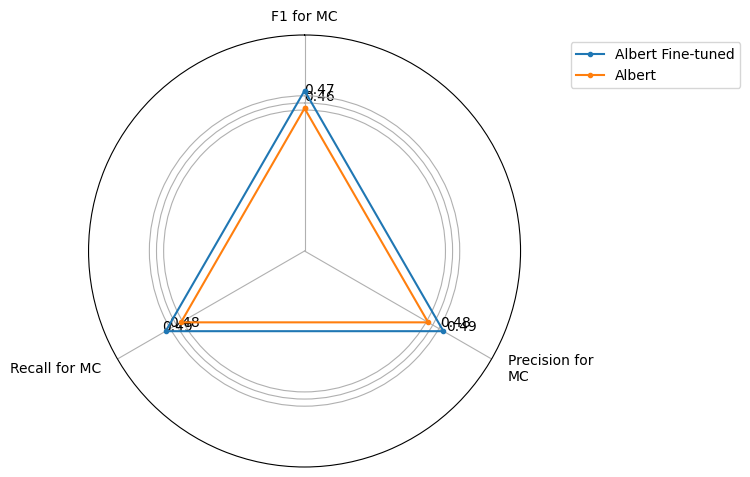

<Figure size 800x800 with 0 Axes>

In [ ]:
# Albert radar plot
# Drop the 'Model' and 'Accuracy for TEXT' columns from the results dataframe as they are not needed for the radar plot
data = albert_results.drop(columns=["Model", "Accuracy for TEXT"])

# Keep only columns with more than one unique value to avoid including constant columns
data = data.loc[:, data.nunique() > 1]

# Set the fixed y-axis limits for the radar plot (adjustable as needed for better visualization)
fixed_ylim = (0.15, 0.6)

# Create configuration for the radar plot to prevent label overlap
config = {
    "theta_tick_lbls": {"fontsize": 10},  # Set font size for labels
    "theta_tick_lbls_pad": 3,  # Increase padding between labels and the plot to create more space
    "theta_tick_lbls_txt_wrap": 15,  # Wrap long text into multiple lines
    "rgrid_tick_lbls_args": {"fontsize": 10},  # Adjust fontsize for the grid ticks (numerical labels like 0.2, 0.4, etc.)
    "legend_loc": "upper left",  # Place the legend outside the plot area to avoid overlap
    "bbox_to_anchor": (1.1, 1),  # Move the legend outside the plot area
    "legend_args": {"fontsize": 10}  # Set the font size for the legend
}

# Create the radar plot using the filtered data and model names (using 'Model' column from albert_results)
plot = radar_plot(data=data, model_names=albert_results["Model"], config=config)

# Manually set y-axis limits for all axes of the radar plot to ensure consistency (scaling fix)
for ax in plot.axes:
    ax.set_ylim(fixed_ylim)

# Adjust figure size to give more space for the plot
plt.figure(figsize=(8, 8))

# Apply tight layout to avoid overlapping elements
plt.tight_layout()

# Show the plot for Albert and Albert Fine-tuned
plot.show()


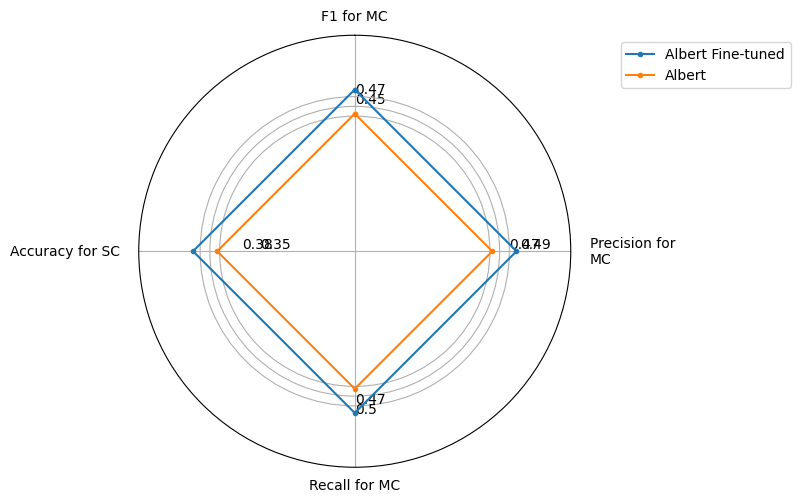

<Figure size 800x800 with 0 Axes>

In [ ]:
# BERT radar plot
# Drop the 'Model' and 'Accuracy for TEXT' columns from the results dataframe as they are not needed for the radar plot
data = bert_results.drop(columns=["Model", "Accuracy for TEXT"])

# Keep only columns with more than one unique value to avoid including constant columns
data = data.loc[:, data.nunique() > 1]

# Set the fixed y-axis limits for the radar plot (adjustable as needed for better visualization)
fixed_ylim = (0.15, 0.6)

# Create configuration for the radar plot to prevent label overlap
config = {
    "theta_tick_lbls": {"fontsize": 10},  # Set font size for labels
    "theta_tick_lbls_pad": 3,  # Increase padding between labels and the plot to create more space
    "theta_tick_lbls_txt_wrap": 15,  # Wrap long text into multiple lines
    "rgrid_tick_lbls_args": {"fontsize": 10},  # Adjust fontsize for the grid ticks (numerical labels like 0.2, 0.4, etc.)
    "legend_loc": "upper left",  # Place the legend outside the plot area to avoid overlap
    "bbox_to_anchor": (1.1, 1),  # Move the legend outside the plot area
    "legend_args": {"fontsize": 10}  # Set the font size for the legend
}

# Create the radar plot using the filtered data and model names (using 'Model' column from albert_results)
plot = radar_plot(data=data, model_names=albert_results["Model"], config=config)

# Manually set y-axis limits for all axes of the radar plot to ensure consistency (scaling fix)
for ax in plot.axes:
    ax.set_ylim(fixed_ylim)

# Adjust figure size to give more space for the plot
plt.figure(figsize=(8, 8))

# Apply tight layout to avoid overlapping elements
plt.tight_layout()

# Show the plot for Albert and Albert Fine-tuned
plot.show()


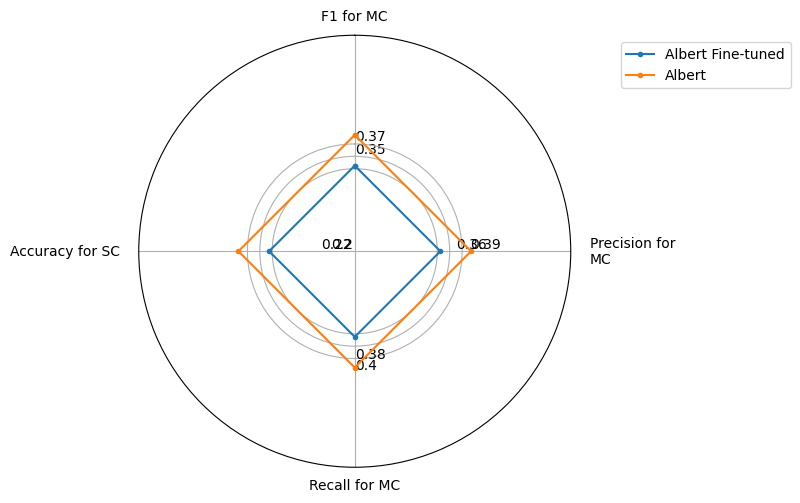

<Figure size 800x800 with 0 Axes>

In [ ]:
# RoBERTa and XLNet radar plot
# Drop the 'Model' and 'Accuracy for TEXT' columns from the results dataframe as they are not needed for the radar plot
data = roberta_xlnet_results.drop(columns=["Model", "Accuracy for TEXT"])

# Keep only columns with more than one unique value to avoid including constant columns
data = data.loc[:, data.nunique() > 1]

# Set the fixed y-axis limits for the radar plot (adjustable as needed for better visualization)
fixed_ylim = (0.15, 0.6)

# Create configuration for the radar plot to prevent label overlap
config = {
    "theta_tick_lbls": {"fontsize": 10},  # Set font size for labels
    "theta_tick_lbls_pad": 3,  # Increase padding between labels and the plot to create more space
    "theta_tick_lbls_txt_wrap": 15,  # Wrap long text into multiple lines
    "rgrid_tick_lbls_args": {"fontsize": 10},  # Adjust fontsize for the grid ticks (numerical labels like 0.2, 0.4, etc.)
    "legend_loc": "upper left",  # Place the legend outside the plot area to avoid overlap
    "bbox_to_anchor": (1.1, 1),  # Move the legend outside the plot area
    "legend_args": {"fontsize": 10}  # Set the font size for the legend
}


# Create the radar plot using the filtered data and model names (using 'Model' column from albert_results)
plot = radar_plot(data=data, model_names=albert_results["Model"], config=config)

# Manually set y-axis limits for all axes of the radar plot to ensure consistency (scaling fix)
for ax in plot.axes:
    ax.set_ylim(fixed_ylim)

# Adjust figure size to give more space for the plot
plt.figure(figsize=(8, 8))

# Apply tight layout to avoid overlapping elements
plt.tight_layout()

# Show the plot for Albert and Albert Fine-tuned
plot.show()

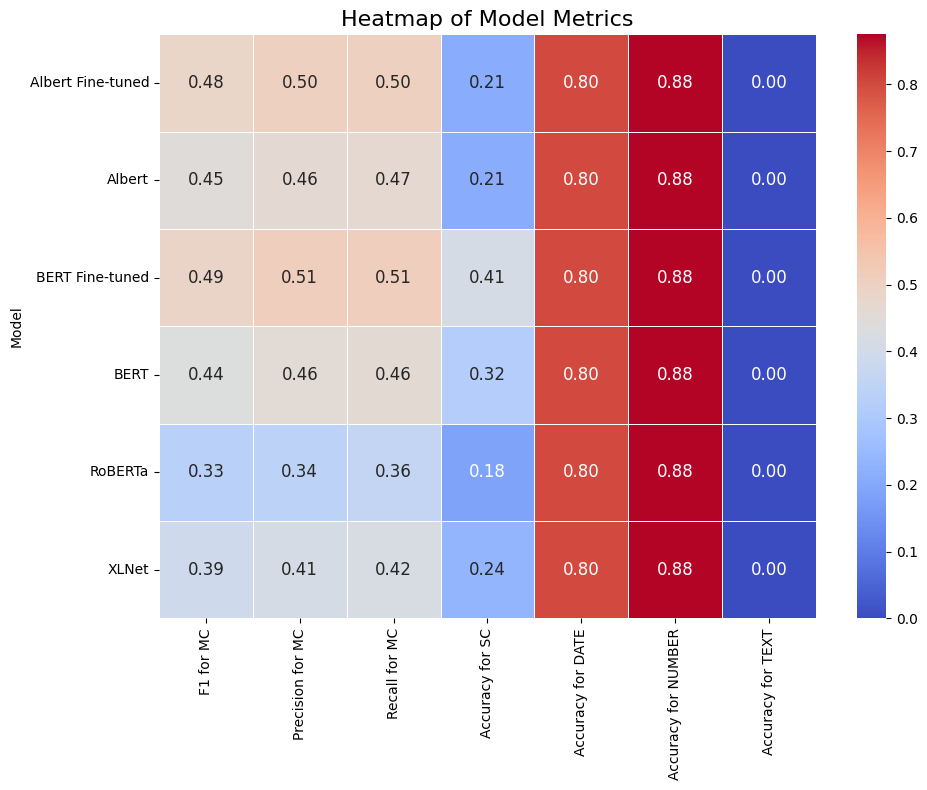

In [ ]:
# Create a copy of the results dataframe
results_heatmap = results_df.copy()

# Set the 'Model' column as the index so that it appears as row labels
results_heatmap.set_index('Model', inplace=True)

# Drop the 'index' column if it's still present (optional)
results_heatmap = results_heatmap.drop(columns=["index"], errors='ignore')

# Create a heatmap for the raw values
plt.figure(figsize=(10, 8))  # Increase figure size for better visualization
sns.heatmap(results_heatmap, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 12})

# Rotate the row labels (model names) by 90 degrees
plt.yticks(rotation=0)  # This keeps row labels horizontal
plt.xticks(rotation=90)  # Rotate column labels (metrics) 90 degrees for better readability

# Set the title and adjust the layout
plt.title("Heatmap of Model Metrics", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()
